In [1]:
%reload_ext autoreload
#%autoreload 2


### 1D

Populating the interactive namespace from numpy and matplotlib


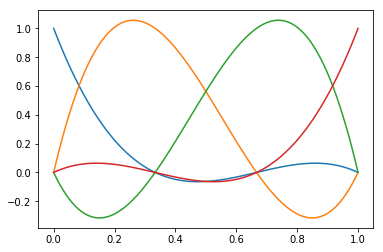

overlap integrals:
[[  3.7    -4.725   1.35   -0.325]
 [ -4.725  10.8    -7.425   1.35 ]
 [  1.35   -7.425  10.8    -4.725]
 [ -0.325   1.35   -4.725   3.7  ]]
poly overlap integrals:
[[ 0.125       0.01666667  0.00833333  0.00714286]
 [ 0.375       0.075       0.         -0.02142857]
 [ 0.375       0.3         0.225       0.17142857]
 [ 0.125       0.10833333  0.1         0.09285714]]


In [9]:
%pylab inline

from Electromagnetics.FEM import FEMElemNode1D, BasisTypes


fem_elem = FEMElemNode1D(elemOrder=3, basisType=BasisTypes.lagrange_1D)

x, bases = fem_elem.getBasisPlot(N=100)

for i in range(len(bases)):
    plot(x, bases[i])
    
show()

bases_overlap = fem_elem.getOvIntdmBidnBj(m=1, n=1)
print("overlap integrals:", bases_overlap, sep='\n')

bfp_overlap= fem_elem.getOvIntdmBiP(poly_order=3)
print("poly overlap integrals:", bfp_overlap, sep='\n')


In [10]:
from Electromagnetics.FEM import MeshGen1D

mesh1d = MeshGen1D(0.0, 1.0, 0.3)

nodes, sects, nodes_labels, sides_labels = mesh1d.GenerateUniformMesh()

print('nodes: \n', nodes)
print('sects: \n', sects.T)
print('nodes labels: \n', nodes_labels)
print('sides labels: \n', sides_labels)


nodes: 
 [ 0.          0.33333333  0.66666667  1.        ]
sects: 
 [[0 1 2]
 [1 2 3]]
nodes labels: 
 [ 1 -1 -1  2]
sides labels: 
 [-1 -1 -1]


sidesBases: 
 [[0 1 2]
 [4 5 6]
 [1 2 3]]
sides labels: 
 {-1: array([0, 1, 2])}
nodes_connectedSides: 
 [[-1  0  1  2]
 [ 0  1  2 -1]]


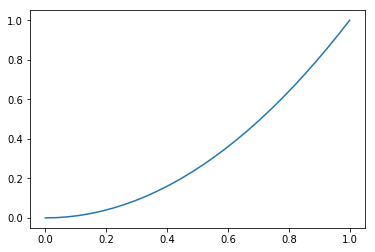

In [11]:
from Electromagnetics.FEM import FEM1D

fem1d = FEM1D()

fem1d.SetStruct(nodes, sects, nodes_labels, sides_labels)

sidesBases = fem1d.SetGlobalIndices(elem_order=2, elem_type=BasisTypes.lagrange_1D)

print('sidesBases: \n', sidesBases.T)

print('sides labels: \n', fem1d.labels_sides)

print('nodes_connectedSides: \n', fem1d.nodes_connectedSides.T)

from Electromagnetics.FEM import AssemblyProcess, BCTypes, CoeffTypes


procParams = {'coeffType':CoeffTypes.constant, 'C':1.0, 'dUi':1, 'dUj':1}
fem1d.DefineMatrixAssemblyProcess(description='mat', label=-1, proc=AssemblyProcess.galerkin, procParams=procParams)

procParams = {'coeffType':CoeffTypes.constant, 'C':-2.0, 'dUi':0}
fem1d.DefineMatrixAssemblyProcess(description='rhs', label=-1, proc=AssemblyProcess.galerkin, procParams=procParams)

bcParams = {'rhs':0.0}
procParams = {'bcType':BCTypes.Dirichlet, 'bcParams':bcParams}
fem1d.DefineMatrixAssemblyProcess(description='bc', label=1, proc=AssemblyProcess.galerkin, procParams=procParams)

bcParams = {'rhs':1.0}
procParams = {'bcType':BCTypes.Dirichlet, 'bcParams':bcParams}
fem1d.DefineMatrixAssemblyProcess(description='bc', label=2, proc=AssemblyProcess.galerkin, procParams=procParams)

x_res = fem1d.AssembleMatrix()

x, fx = fem1d.GetFieldPlot()

plot(x, fx)

### 2D

Populating the interactive namespace from numpy and matplotlib


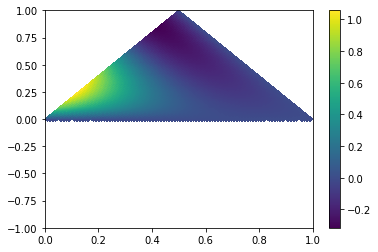

{(0, 1, 2): 8, (3, 0, 0): 0, (1, 0, 2): 5, (2, 1, 0): 1, (2, 0, 1): 2, (0, 3, 0): 6, (1, 1, 1): 4, (1, 2, 0): 3, (0, 0, 3): 9, (0, 2, 1): 7}
[0, 6, 9]
[[7, 8], [5, 2], [1, 3]]


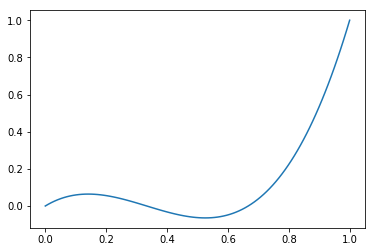

M_inv = 
 [[-1. -1.  3.]
 [ 1. -0. -1.]
 [-0.  1. -1.]]
_dx_ :  {(1, 0, 0): -1.0, (0, 1, 0): 1.0, (0, 0, 1): -0.0}
_dy_ :  {(1, 0, 0): -1.0, (0, 1, 0): -0.0, (0, 0, 1): 1.0}
{(0, 1, 1): 1.0, (0, 0, 2): -0.0, (1, 1, 0): -1.0, (1, 0, 1): -1.0, (0, 2, 0): -0.0, (2, 0, 0): 1.0}


In [12]:
%pylab inline

from Electromagnetics.FEM import FEMElemNode2D, BasisTypes, FEM2D


fem_elem = FEMElemNode2D(elemOrder=3, basisType=BasisTypes.nodeSimplex_2D, \
                         r0=np.array([0.0, 0.0]), r1=np.array([1.0, 0.0]), r2=np.array([0.5, 1.0]))

x, y, b = fem_elem.getBasisPlot(b_ind=(2, 0, 1), n_pts=100)

pcolor(x, y, b)
colorbar()
show()

print(FEMElemNode2D.mapNodeSimplex2DIJKto1D(3, "ijk-to-1d"))
print(FEMElemNode2D.mapNodeSimplex2DIJKto1D(3, "nodes-1d"))
print(FEMElemNode2D.mapNodeSimplex2DIJKto1D(3, "sides-1d"))

#x, y = fem_elem.B_NodeSimplex[3].linspace(100)
x = np.linspace(0, 1, 100)
y = fem_elem.B_NodeSimplex[3](x)
plot(x, y)
show()

_dx_dy_ = FEMElemNode2D.NodeSimplex2D_dxyTodL(dx_order=1, dy_order=1, r0=np.array([1.0, 1.0]), r1=np.array([2.0, 1.0]), \
            r2=np.array([1.0, 2.0]))
print(_dx_dy_)


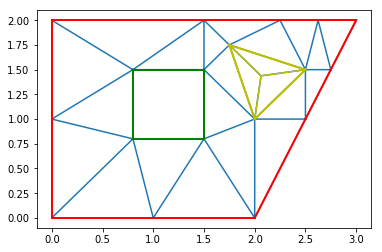

n_nodes :  19
n_sides :  42
n_facets :  18
n_elems :  23


In [13]:
%matplotlib inline

import numpy as np
from Electromagnetics.FEM import MeshGen2D
import matplotlib.pyplot as plt

mg = MeshGen2D()

points = [(0.0,0.0), (2.0,0.0), (3.0, 2.0), (0.0, 2.0)] + \
         [(0.8, 0.8), (0.8, 1.5), (1.5, 1.5), (1.5, 0.8)] + \
         [(2.0, 1.0), (2.5, 1.5), (1.75, 1.75)]

points_bound = [0, 1, 2, 3]
points_hole = [4, 5, 6, 7]
points_reg1 = [8, 9, 10]
facets_bound = mg.roundTripConnect(points_bound)
facets_hole = mg.roundTripConnect(points_hole)
facets_reg1 = mg.roundTripConnect(points_reg1)

mg.AddLabel('bound_marker', 'r')
mg.AddLabel('hole_marker', 'g')
mg.AddLabel('reg1_marker', 'y')

boundary = {'points':points_bound, 'sides':facets_bound, 'points_labels':[mg.labels['bound_marker']]*len(points_bound), 
            'sides_labels':[mg.labels['bound_marker']]*len(facets_bound), 'v_max':0.5}
holes = []
holes.append({'points':points_hole, 'sides':facets_hole, 'points_labels':[mg.labels['hole_marker']]*len(points_hole), 
            'sides_labels':[mg.labels['hole_marker']]*len(facets_hole), 'point_inside':(1.25, 1.25)})

regions = []
regions.append({'points':points_reg1, 'sides':facets_reg1, 'points_labels':[mg.labels['reg1_marker']]*len(points_reg1), 
            'sides_labels':[mg.labels['reg1_marker']]*len(facets_reg1), 'point_inside':(2.1, 1.4), 'v_max':0.1,
            'region_label':mg.labels['reg1_marker']})

mg.SetDomain(points, boundary, holes, regions)

mesh = mg.BuildMesh()

mg.PlotMesh(showlabels=['sides', 'regions'])   ## showlabels=['nodes', 'sides', 'regions']

print('n_nodes : ', len(np.array(mesh.points)))
print('n_sides : ', len(np.array(mesh.faces)))
print('n_facets : ', len(np.array(mesh.facets)))
print('n_elems : ', len(np.array(mesh.elements)))
#print(np.array(mesh.elements))
#print(np.array(mesh.faces))
#print(np.array(mesh.points))


In [14]:

fem2d = FEM2D()
fem2d.SetStruct(mesh)

fem2d.SetGlobalIndices(elem_order=3, elem_type=BasisTypes.nodeSimplex_2D)


n_base_T :  126


array([[  0,   1,   2,  19,  20,  21,  22,  23,  24, 103],
       [  1,   3,   4,  25,  26,  27,  28,  29,  30, 104],
       [  5,   6,   2,  31,  32,  33,  34,  35,  36, 105],
       [  7,   8,   9,  37,  38,  39,  40,  41,  42, 106],
       [ 10,  11,  12,  43,  44,  45,  46,  47,  48, 107],
       [ 13,  12,   5,  49,  50,  51,  52,  53,  54, 108],
       [  3,  14,   4,  55,  56,  26,  25,  57,  58, 109],
       [  9,  11,  10,  48,  47,  59,  60,  61,  62, 110],
       [  4,   7,  13,  63,  64,  65,  66,  67,  68, 111],
       [  7,   4,  14,  56,  55,  69,  70,  68,  67, 112],
       [ 14,   8,   7,  42,  41,  70,  69,  71,  72, 113],
       [ 13,   7,  10,  73,  74,  75,  76,  64,  63, 114],
       [  9,  15,  11,  77,  78,  62,  61,  79,  80, 115],
       [  9,  16,   7,  81,  82,  40,  39,  83,  84, 116],
       [ 15,  17,  18,  85,  86,  87,  88,  89,  90, 117],
       [ 12,   6,   5,  36,  35,  50,  49,  91,  92, 118],
       [  9,  10,  16,  93,  94,  84,  83,  60,  59, 119